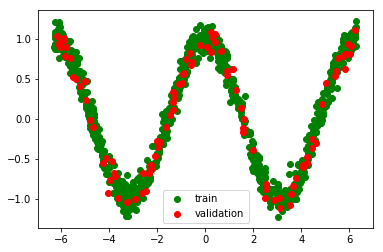

epoch 0, cost = 49.9814
epoch 100, cost = 23.5199
epoch 200, cost = 20.6282
epoch 300, cost = 18.217
epoch 400, cost = 15.2565
epoch 500, cost = 11.1392
epoch 600, cost = 7.68492
epoch 700, cost = 4.96024
epoch 800, cost = 3.05806
epoch 900, cost = 1.89535
epoch 1000, cost = 1.25521
epoch 1100, cost = 0.908075
epoch 1200, cost = 0.714583
epoch 1300, cost = 0.610083
epoch 1400, cost = 0.562533


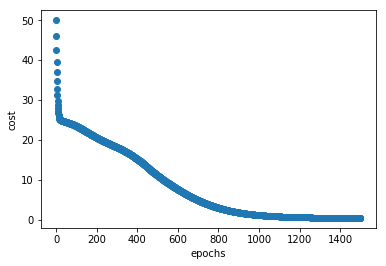

In [4]:
import tensorflow as tf
import numpy as np
import math, random
import matplotlib.pyplot as plt


np.random.seed(1000) 
function_to_learn = lambda x: np.cos(x) + 0.1*np.random.randn(*x.shape)
layer_1_neurons = 10
NUM_points = 1000
#TRAIN_SPLIT = .8
batch_size = 100
NUM_EPOCHS = 1500


all_x = np.float32(np.random.uniform(-2*math.pi, 2*math.pi, (1, NUM_points))).T
np.random.shuffle(all_x)


train_size = int(900)
#the first train_size points are in the training set 
x_training = all_x[:train_size]
y_training = function_to_learn(x_training)

#the last (NUM_points - train_size) are in the validation set
x_validation = all_x[train_size:]
y_validation = function_to_learn(x_validation)

plt.figure(1)
plt.scatter(x_training, y_training, c='green', label='train')
plt.scatter(x_validation, y_validation, c='red', label='validation')
plt.legend()
plt.show()

X = tf.placeholder(tf.float32, [None, 1], name="X")
Y = tf.placeholder(tf.float32, [None, 1], name="Y")

#first layer
#Number of neurons = 10
w_h = tf.Variable(tf.random_uniform([1, layer_1_neurons],\
                                    minval=-1, maxval=1, dtype=tf.float32))
b_h = tf.Variable(tf.zeros([1, layer_1_neurons], dtype=tf.float32))
h = tf.nn.sigmoid(tf.matmul(X, w_h) + b_h)

#output layer
#Number of neurons = 10
w_o = tf.Variable(tf.random_uniform([layer_1_neurons, 1],\
                                    minval=-1, maxval=1, dtype=tf.float32))
b_o = tf.Variable(tf.zeros([1, 1], dtype=tf.float32))

#build the model
model = tf.matmul(h, w_o) + b_o

#minimize the cost function (model - Y)
train_op = tf.train.AdamOptimizer().minimize(tf.nn.l2_loss(model - Y))

#Start the Learning phase
sess = tf.Session()
try:
    sess.run(tf.global_variables_initializer())

    errors = []
    for i in range(NUM_EPOCHS):
        for start, end in zip(range(0, len(x_training), batch_size),\
                              range(batch_size, len(x_training), batch_size)):
            sess.run(train_op, feed_dict={X: x_training[start:end],\
                                          Y: y_training[start:end]})
        cost = sess.run(tf.nn.l2_loss(model - y_validation),\
                        feed_dict={X:x_validation})
        errors.append(cost)
        if i%100 == 0: print ("epoch %d, cost = %g" % (i, cost))

    plt.plot(range(NUM_EPOCHS), errors, 'o', label='MLP Function Approximation')
    plt.xlabel('epochs')
    plt.ylabel('cost')
    plt.legend 
    plt.show()
except:
    print("EXCEPTION")
    sess.close()